# Modeling Vehicle Value: A Comparative Study of Machine Learning Techniques


In [31]:
#import sys
#!{sys.executable} -m pip install statsmodels seaborn;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Import the data

In [2]:
car=pd.read_csv("vehicles.csv")
#Display the first few rows of the dataframe
car.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data exploration and cleaning

In [3]:
car.count()

id              426880
region          426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
state           426880
dtype: int64

In [4]:
#Checking for missing values
car.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [5]:
car1=car.dropna().set_index('id')
car1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


## Prepocessing

In [6]:
categorical_columns = car1.select_dtypes(include=['object']).columns
car1[categorical_columns] = car1[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Print the updated DataFrame
car1.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7303227528,391,12995,2016.0,0,209,0,1,0,61127.0,0,0,7099,1,1,1,2,50
7303114896,391,32999,2014.0,4,5130,1,2,2,154642.0,0,0,21916,2,0,8,6,50
7303112347,391,15999,2018.0,0,1685,1,1,0,36465.0,0,0,4090,1,2,1,5,50
7302338378,391,6800,1997.0,20,475,3,2,0,69550.0,0,0,21937,0,1,2,0,50
7302301268,391,0,2018.0,14,54,1,0,2,20492.0,0,0,1179,2,0,3,0,50


#### Get the most important features

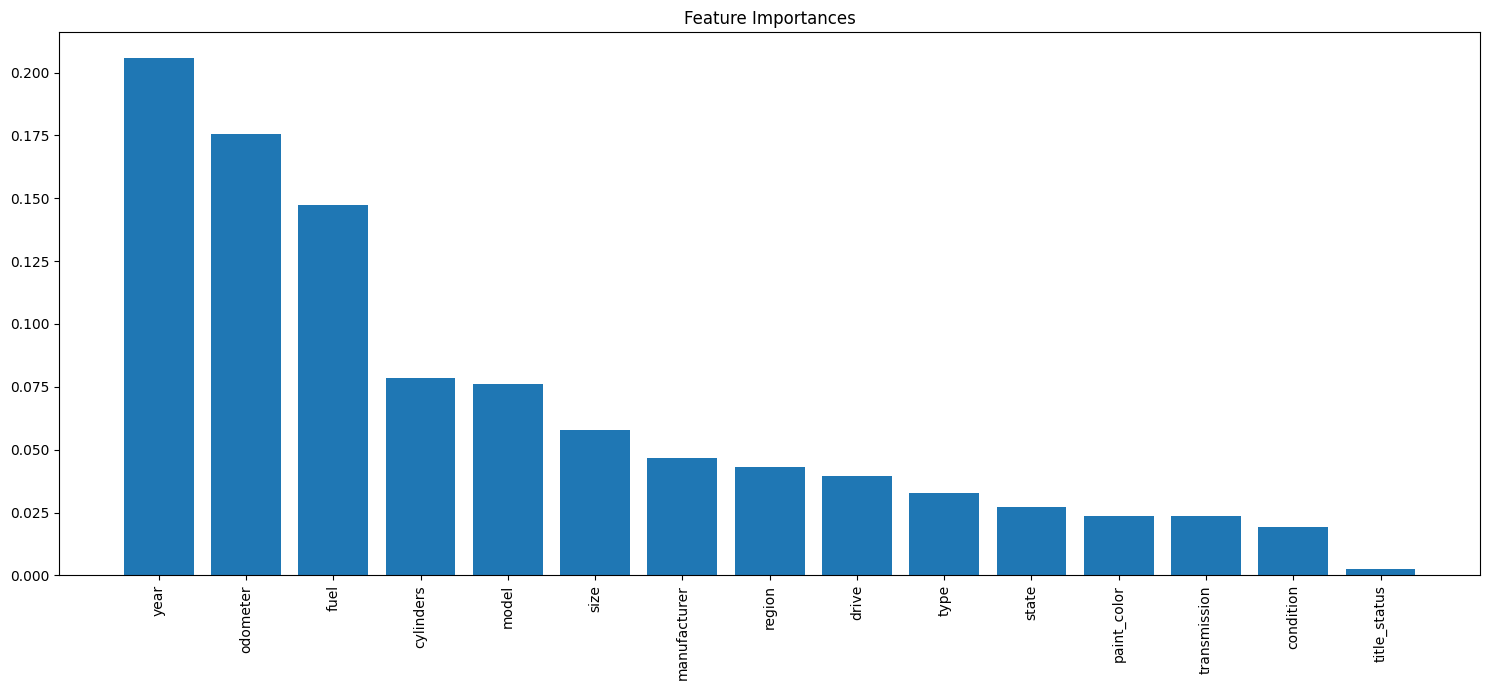

In [7]:
# Split the data into features and target variable
car1=car1.drop('VIN',axis=1)
X = car1.drop('price', axis=1)
y =car1['price']

# Building the Random Forest model on the entire dataset
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extracting feature importance
feature_importances = model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting Feature Importances
plt.figure(figsize=(15, 7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## Model Selection
Chose five machine learning models for regression. Common choices are Linear Regression, Random Forest, Gradient Boosting, Support Vector Regression, and K-Nearest Neighbors.

In [8]:
# Selecting relevant features including target variable 'price'
features = ['year', 'odometer', 'fuel', 'cylinders', 'model', 'size', 'manufacturer', 'price']
data = car1[features]
# Split the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initializing models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

#### Model training and Evaluation

In [10]:
models = [linear_model, rf_model, gb_model, svr_model, knn_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'KNN']

# Dictionary to store metrics
metrics = {'R2 Score': [], 'MSE': [], 'MAE': []}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics['R2 Score'].append(r2_score(y_test, y_pred))
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, index=model_names)

In [11]:
metrics_df_sorted = metrics_df.sort_values('R2 Score', ascending=False)
metrics_df.round(4)

,R2 Score,MSE,MAE
Linear Regression,0.2050,1.501624e+08,8160.4874
Random Forest,0.7661,4.418207e+07,3002.0240
Gradient Boosting,0.5508,8.484036e+07,5631.9694
SVR,-0.0158,1.918612e+08,9587.3966
KNN,0.3583,1.212035e+08,6897.7705


#### Comparison and Visualization

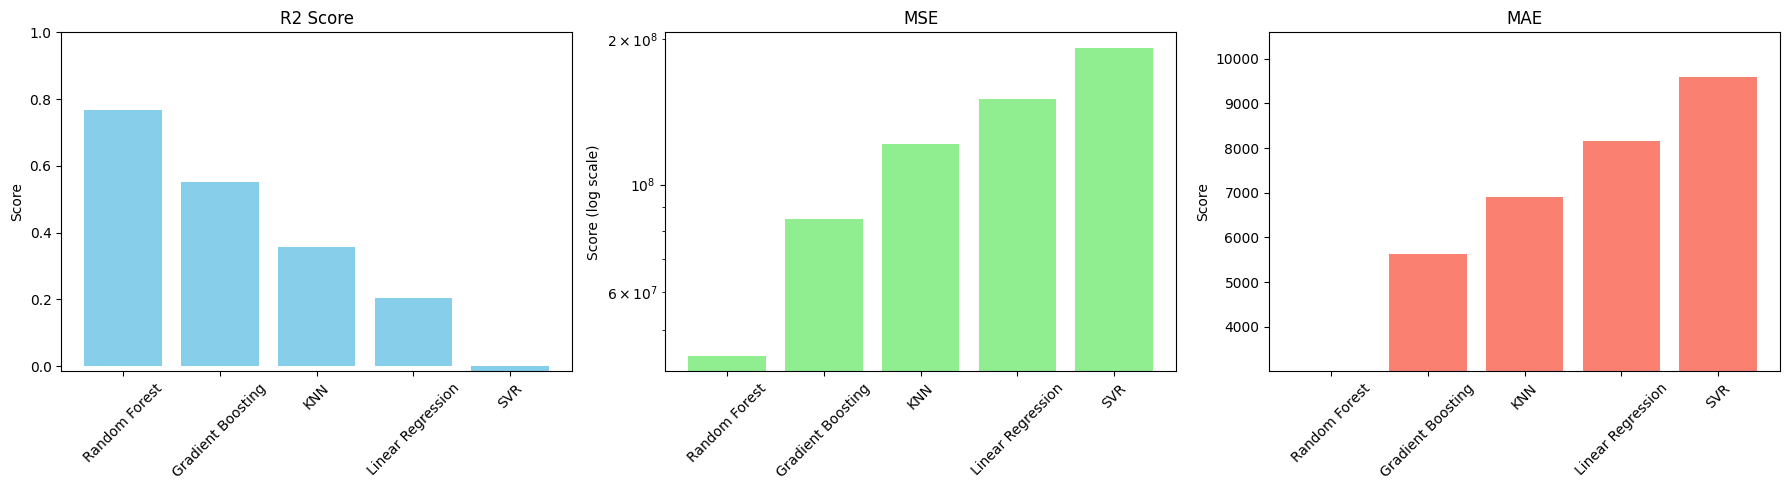

In [12]:
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Linear Regression', 'SVR']
r2_scores = [0.7661, 0.5508, 0.3583, 0.2050, -0.0158]
mses = [4.418207e+07, 8.484036e+07, 1.212035e+08, 1.501624e+08, 1.918612e+08]
maes = [3002.0240, 5631.9694, 6897.7705, 8160.4874, 9587.3966]

# Sorting the model names by R2 Score for consistent ordering in all plots
sorted_indices = np.argsort(r2_scores)[::-1]
model_names_sorted = np.array(model_names)[sorted_indices]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Set positions for the x-ticks
positions = np.arange(len(model_names_sorted))

# R2 Score subplot
axes[0].bar(positions, np.array(r2_scores)[sorted_indices], color='skyblue')
axes[0].set_title('R2 Score')
axes[0].set_xticks(positions)
axes[0].set_xticklabels(model_names_sorted, rotation=45)
axes[0].set_ylim(min(r2_scores), 1)  # Set the limits of y-axis to the min and max of R2 Score

# MSE subplot
axes[1].bar(positions, np.array(mses)[sorted_indices], color='lightgreen')
axes[1].set_title('MSE')
axes[1].set_xticks(positions)
axes[1].set_xticklabels(model_names_sorted, rotation=45)
axes[1].set_yscale('log')  # Use log scale due to large range of values

# MAE subplot
axes[2].bar(positions, np.array(maes)[sorted_indices], color='salmon')
axes[2].set_title('MAE')
axes[2].set_xticks(positions)
axes[2].set_xticklabels(model_names_sorted, rotation=45)
axes[2].set_ylim(min(maes), max(maes) + 1000)  # Set the limits of y-axis to include all MAE values

# Set the y-axis label
axes[0].set_ylabel('Score')
axes[1].set_ylabel('Score (log scale)')
axes[2].set_ylabel('Score')

plt.tight_layout()

## Prediction of the model:
The numbers in the array [[2021, 10000, 1, 2, 30, 3, 7]] are the feature values for a single prediction instance, which may represent:

2021: The year of the car.
10000: The odometer reading (in miles or kilometers).
1: The encoded category for the 'fuel' feature.
2: The encoded category for the 'cylinders' feature.
30: The encoded category for the 'model' feature.
3: The encoded category for the 'size' feature.
7: The encoded category for the 'manufacturer' feature.
Each number for the categorical features represents the integer assigned to a specific category during the factorization process. For example, if 'fuel' originally had categories like ['gas', 'diesel', 'electric'], and 'gas' was the second category encountered when the feature was factorized, then it would be assigned the integer 1 (since factorization indexing starts from 0).

In [16]:
# Define the feature names as they were during training
feature_names = ['year', 'odometer', 'fuel', 'cylinders', 'model', 'size', 'manufacturer']
# Correct structure for new_car_features:
# Each sublist corresponds to a single observation (row) with all columns (features).
new_car_features = [[2020, 10000, 1, 2, 30, 3, 7]]  
new_car_features_df = pd.DataFrame(new_car_features, columns=feature_names)
# Predict the price using the Random Forest model
predicted_price = rf_model.predict(new_car_features_df)
print("Predicted Price:", predicted_price[0])

Predicted Price: 18422.0


## Mapping Categorical features 

In [17]:
# Selected categorical features
categorical_features = ['fuel', 'cylinders', 'model', 'size', 'manufacturer']

# Dictionary to hold the mappings
factorized_mappings = {}

for feature in categorical_features:
    # Factorize the categorical feature
    car[feature], unique_categories = pd.factorize(car[feature])
    
    # Store the unique categories for each feature
    factorized_mappings[feature] = unique_categories

# Now, you can access the mappings for each feature
# For example, to get the original category for the encoded value of 1 in the 'fuel' feature:
encoded_value = 1
original_category = factorized_mappings['fuel'][encoded_value]
print(f"The original category for 'fuel' encoded as {encoded_value} is: {original_category}")

# To see the entire mapping for 'fuel':
print(f"Mapping for 'fuel': {factorized_mappings['fuel']}")

# If you want to print out the mapping for each feature:
for feature, mappings in factorized_mappings.items():
    print(f"Mapping for '{feature}':")
    for encoded_value, original_category in enumerate(mappings):
        print(f"  {encoded_value} => {original_category}")

The original category for 'fuel' encoded as 1 is: other
Mapping for 'fuel': Index(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype='object')
Mapping for 'fuel':
  0 => gas
  1 => other
  2 => diesel
  3 => hybrid
  4 => electric
Mapping for 'cylinders':
  0 => 8 cylinders
  1 => 6 cylinders
  2 => 4 cylinders
  3 => 5 cylinders
  4 => other
  5 => 3 cylinders
  6 => 10 cylinders
  7 => 12 cylinders
Mapping for 'model':
  0 => sierra 1500 crew cab slt
  1 => silverado 1500
  2 => silverado 1500 crew
  3 => tundra double cab sr
  4 => f-150 xlt
  5 => sierra 2500 hd extended cab
  6 => silverado 1500 double
  7 => tacoma
  8 => colorado extended cab
  9 => corvette grand sport
  10 => cherokee
  11 => wrangler unlimited sport
  12 => silverado 1500 regular
  13 => colorado crew cab z71
  14 => tacoma access cab pickup
  15 => camaro ss coupe 2d
  16 => tundra crewmax sr5 pickup
  17 => ranger supercrew xl pickup
  18 => frontier crew cab pro-4x
  19 => compass
  20 => f150 super c